Looking at simple linear regression and exploring peculiarities

In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Using data from kaggle that is generally along the y = x path with random noise added in. Creating a simple linear regression model using the data
<br> https://www.kaggle.com/datasets/andonians/random-linear-regression
<br>Also known as "the dumbest dataset on kaggle"

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Simple plot to look at the general trend of the data

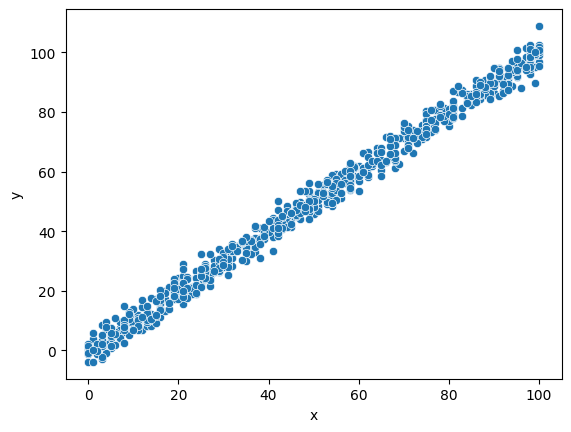

In [4]:
fig = sns.scatterplot(x = train.x, y = train.y)

Simple linear regression model should be able to very accurately represent this data

In [5]:
#Getting rid of null values
train = train[~train.y.isnull()]

In [6]:
model = LinearRegression()
model.fit(train[['x']], train[['y']])

LinearRegression()

In [7]:
print('Coefficient of x is ', model.coef_)
print('Intercept is ', model.intercept_)
# Formula ends up being y = 1.00065638x - 0.10726546

Coefficient of x is  [[1.00065638]]
Intercept is  [-0.10726546]


Plot the line with the scatterplot

C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

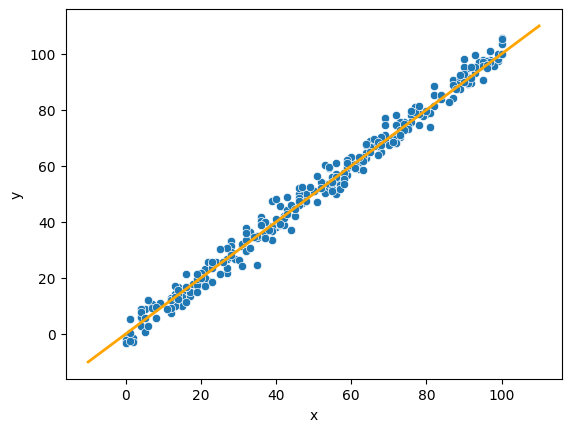

In [8]:
fig = sns.scatterplot(x = test.x, y = test.y)
sns.lineplot(x = [-10, 110], y = [model.predict([[-10]])[0][0], model.predict([[110]])[0][0]], color = 'orange', linewidth = 2)

RMSE and MAE on test data

In [9]:
preds = pd.DataFrame(model.predict(test[['x']]))
rmse = np.sqrt(mean_squared_error(test.y, preds))
mae = mean_absolute_error(test.y, preds)
print('The rmse is ', rmse)
print('The mae is ', mae)

The rmse is  3.0713062680298293
The mae is  2.4157718500412595


Basic problems that can occur in this type of situation

### Outliers

In [10]:
# Adding outlier to the dataset
train.loc[len(train)] = {'x':1000, 'y':0}

In [12]:
model.fit(train[['x']], train[['y']])

LinearRegression()

C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

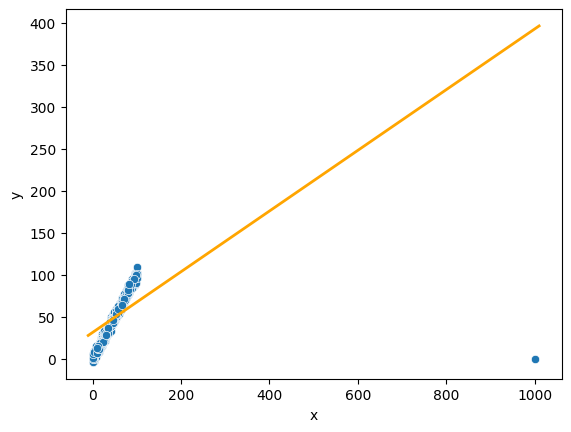

In [17]:
fig = sns.scatterplot(x = train.x, y = train.y)
sns.lineplot(x = [-10, 1010], y = [model.predict([[-10]])[0][0], model.predict([[1010]])[0][0]], color = 'orange', linewidth = 2)

C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

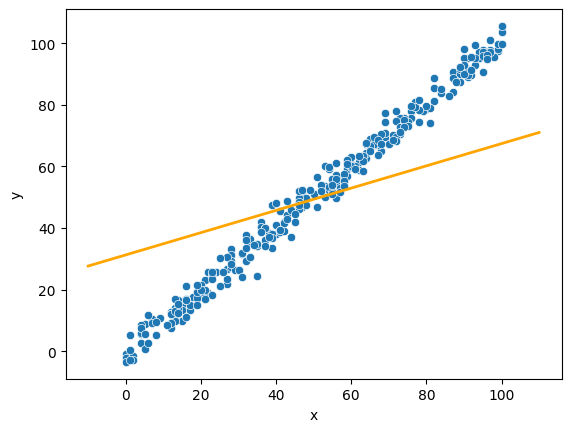

In [13]:
fig = sns.scatterplot(x = test.x, y = test.y)
sns.lineplot(x = [-10, 110], y = [model.predict([[-10]])[0][0], model.predict([[110]])[0][0]], color = 'orange', linewidth = 2)

New rmse and mae

In [18]:
preds = pd.DataFrame(model.predict(test[['x']]))
rmse = np.sqrt(mean_squared_error(test.y, preds))
mae = mean_absolute_error(test.y, preds)
print('The rmse is ', rmse)
print('The mae is ', mae)

The rmse is  18.893310272711762
The mae is  16.058467132040253


As shown, outliers significantly affect the fit and accuracy of the model, thus making outliers an issue when creating a simple linear regression model (and linear regression models in general)

### Assumption of linearity

In [115]:
import random

In [120]:
# Creating new training dataset
f = lambda x: x**2 + random.uniform(-1000, 1000)

x = np.random.uniform(0, 150, 250)
train = pd.DataFrame({'x': x, 'y': [f(i) for i in x]})
x = np.random.uniform(0, 150, 250)
test = pd.DataFrame({'x': x, 'y': [f(i) for i in x]})

<Axes: xlabel='x', ylabel='y'>

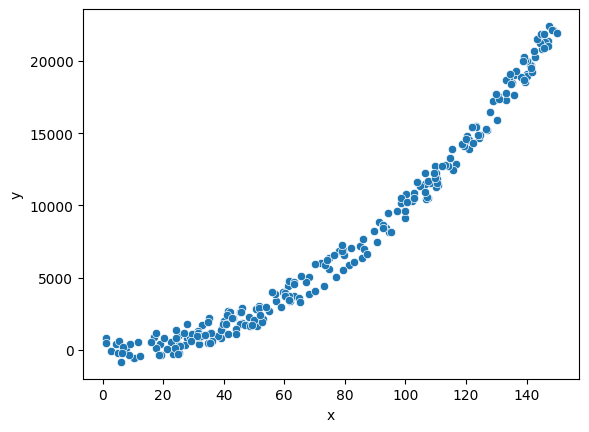

In [121]:
sns.scatterplot(x = train.x, y = train.y)

Plot is now exponential, which will result in a much worse fit

In [122]:
model.fit(train[['x']], train[['y']])

LinearRegression()

C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

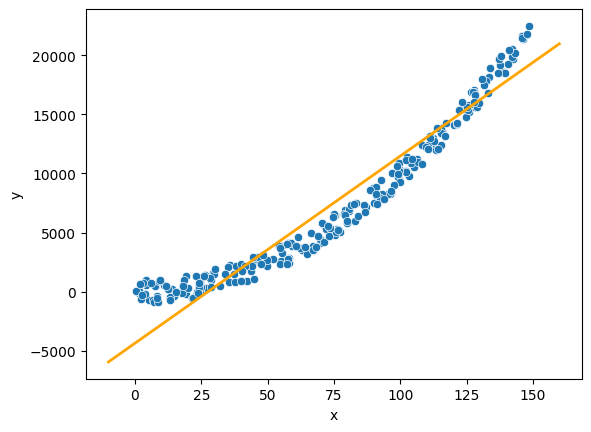

In [123]:
fig = sns.scatterplot(x = test.x, y = test.y)
sns.lineplot(x = [-10, 160], y = [model.predict([[-10]])[0][0], model.predict([[160]])[0][0]], color = 'orange', linewidth = 2)

In [124]:
preds = pd.DataFrame(model.predict(test[['x']]))
rmse = np.sqrt(mean_squared_error(test.y, preds))
mae = mean_absolute_error(test.y, preds)
print('The rmse is ', rmse)
print('The mae is ', mae)

The rmse is  1861.524885819469
The mae is  1556.0169958429597


If however we attempt to linearize the values, the error rate will go way down.

<Axes: xlabel='x', ylabel='y'>

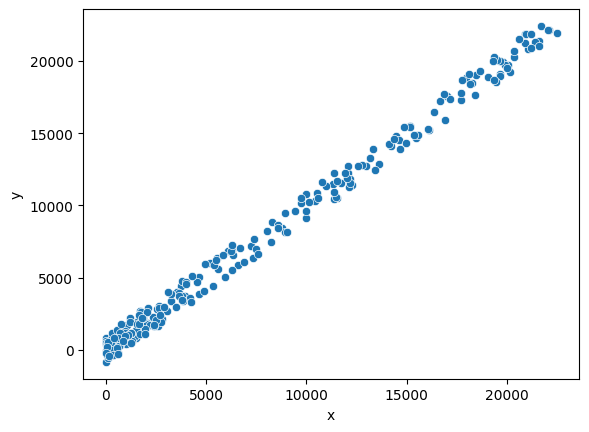

In [130]:
sns.scatterplot(x = train.x**2, y = train.y)

In [132]:
model.fit(train[['x']]**2, train[['y']])

LinearRegression()

C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\nhj4\anaconda3\envs\Personal\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='x', ylabel='y'>

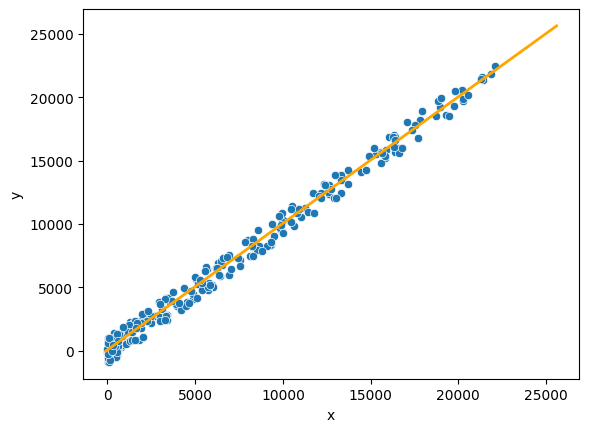

In [138]:
fig = sns.scatterplot(x = test.x**2, y = test.y)
sns.lineplot(x = [-10**2, 160**2], y = [model.predict([[-10]])[0][0], model.predict([[160**2]])[0][0]], color = 'orange', linewidth = 2)

In [140]:
preds = pd.DataFrame(model.predict(test[['x']]**2))
rmse = np.sqrt(mean_squared_error(test.y, preds))
mae = mean_absolute_error(test.y, preds)
print('The rmse is ', rmse)
print('The mae is ', mae)

The rmse is  609.7370607089117
The mae is  536.4226843483107


Error rates decrease by nearly 66%, leaving the amount of error to be within noise levels